<a href="https://colab.research.google.com/github/kinglider/Machine-Learning-Adventures/blob/master/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Imports and Packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#from mpl_toolkits.mplot3d.axes3d import Axes3d
from matplotlib import cm
from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Example 1
## $f(x) = x^2 + x + 1$



In [ ]:
def f(x):
  return x**2 + x + 1

In [ ]:
x_1 = np.linspace(-3,3,10)

In [ ]:
x_1

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

In [ ]:
type(x_1)

numpy.ndarray

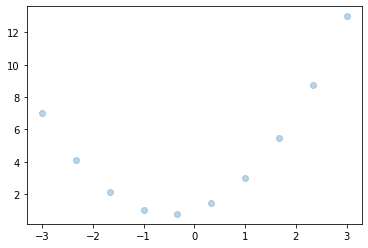

In [ ]:
plt.scatter(x_1,f(x_1),alpha = 0.3)

Text(0, 0.5, '$f(x)$')

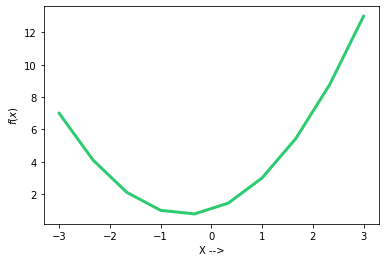

In [ ]:
plt.plot(x_1,f(x_1),color = '#2ecc71',linewidth = 3)
plt.xlabel('X -->')
plt.ylabel('$f(x)$')

# Slopes and Derivatives
## Derivative of a function $f(x)$ 

In [ ]:
def df(x):
  return 2*x + 1

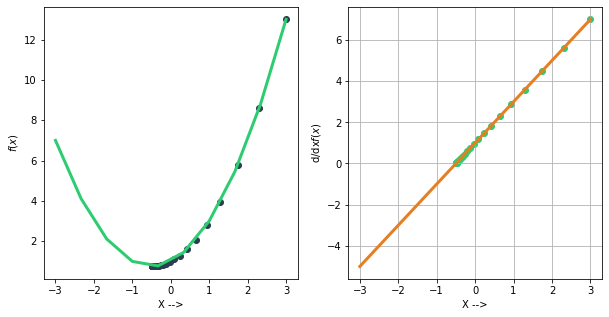

In [ ]:
#Plotting the previous graph and its derivative.
plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
plt.plot(x_1,f(x_1),color = '#2ecc71',linewidth = 3)
plt.xlabel('X -->')
plt.ylabel('$f(x)$')
x_np_array = np.array(x_list)
plt.scatter(x_list,f(x_np_array),color = '#2c3e50')

plt.subplot(1,2,2)
plt.plot(x_1,df(x_1) , color = '#e67e22', linewidth = 3)
plt.grid()
plt.xlabel('X -->')
plt.ylabel('d/dx$f(x)$')
plt.scatter(x_list,slope_list,color= '#2ecc71')

# Gradient Descent


In [ ]:
new_x = 3 # starting point
prev_x = 0 
alpha = 0.1 # learning rate
precision = 0.0001
x_list = [new_x]
slope_list = [df(new_x)]
for i in  range(100):
  prev_x = new_x
  gradient = df(prev_x)
  new_x = prev_x - alpha * gradient
  x_list.append(new_x)
  slope_list.append(df(new_x))
  if abs (new_x - prev_x) < 0.0001:
    break
print('Local minimum: ' , new_x)
print('Slope: ', df(new_x))

Local minimum:  -0.49962781616118024
Slope:  0.0007443676776395236


# Example 2: Multiple Minima vs. Intial Guess
## $$g(x) = x^4 - 4x^2 + 5$$


In [ ]:
x_2 = np.linspace(-2,2,1000)

In [ ]:
def g(x):
  return x**4 - 4*x**2 + 5

In [ ]:
def dg(x):
  return 4*x**3 - 8*x

Text(0, 0.5, '$d/dx g(x)$')

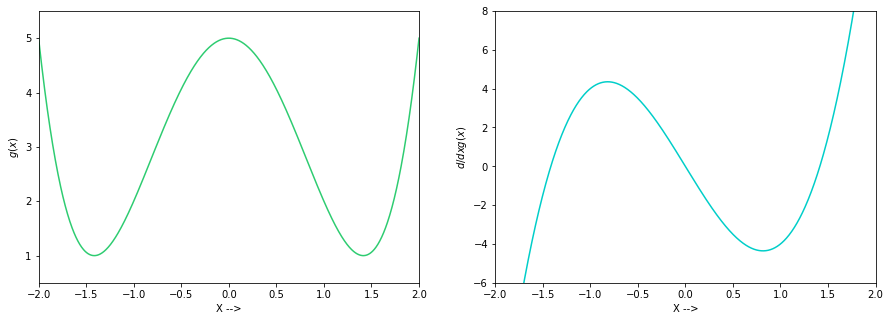

In [ ]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.plot(x_2,g(x_2),color = '#2ecc71')
plt.xlabel('X -->')
plt.ylabel('$g(x)$')

plt.subplot(1,2,2)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.plot(x_2,dg(x_2),color = '#00cec9')
plt.xlabel('X -->')
plt.ylabel('$d/dx g(x)$')

## Gradient Descent as a python function

In [ ]:
def gradient_descent(derivative_func, initial_value, alpha, precision, max_iter):
  new_x = initial_value # starting point
  x_list = [new_x]
  slope_list = [derivative_func(new_x)]
  for i in  range(max_iter):
    prev_x = new_x
    gradient = derivative_func(prev_x)
    new_x = prev_x - alpha * gradient
    x_list.append(new_x)
    slope_list.append(derivative_func(new_x))
    if abs (new_x - prev_x) < 0.0001:
      break
  return new_x, x_list, slope_list #returned as a tuple

In [ ]:
local_minimum , list_x, list_m = gradient_descent(dg,0,0.02,0.001,500)

In [ ]:
local_minimum

0.0

## By changing initial_value, it is evident that the local minimum changes based on proximity. Therefore, initial_value has to be chosen carefully.


# Eample 3: Divergence Overflow And Python Tuples
## $$ h(x) = x^5 - 2x^4 + 2 $$


In [ ]:
x_3 = np.linspace(-2.5,2.5,1000)

In [ ]:
def h(x):
  return x**5 - 2*x**4 + 2

In [ ]:
def dh(x):
  return 5*x**4 - 8*x**3

Local minimum:  1.5998724702484226
Cost:  -0.6214398334848514
Steps:  121


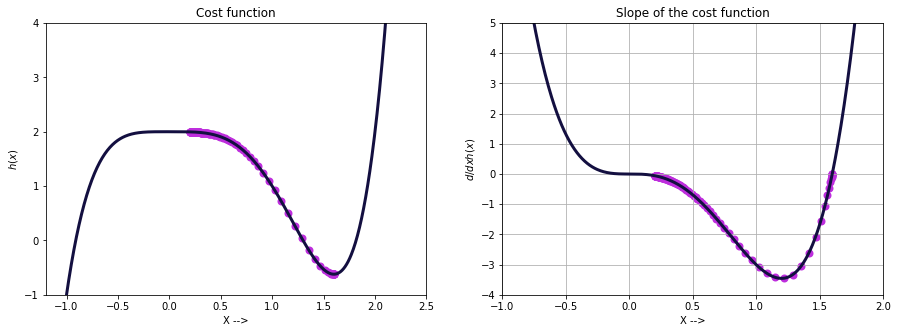

In [ ]:
local_minimum , list_x, list_m = gradient_descent(dh,0.2,0.02,0.001,500)
plt.figure(figsize =[15,5])

#cost function
plt.subplot(1,2,1)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.title('Cost function')
plt.xlabel('X -->')
plt.ylabel('$h(x)$')
plt.plot(x_3,h(x_3), color = '#130f40',linewidth = 3)
plt.scatter(list_x, h(np.array(list_x)), color = '#be2edd', linewidth = 2)

#convert x_list to np array before passing to cost function.

#derivative

plt.subplot(1,2,2)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.grid()
plt.title('Slope of the cost function')
plt.xlabel('X -->')
plt.ylabel('$d/dx h(x)$')
plt.plot(x_3,dh(x_3),color = '#130f40',linewidth=3)
plt.scatter(list_x,list_m,color='#be2edd',linewidth = 2)
#second argument to scatter can be either dh(list_x) or list_m.

print('Local minimum: ',local_minimum)
print('Cost: ',h(local_minimum))
print('Steps: ',len(list_x))

In [ ]:
import sys
sys.version

'3.6.9 (default, Apr 18 2020, 01:56:04) \n[GCC 8.4.0]'

# **Tuples**


In [ ]:
#tuple packing
some_numbers = 1,2,3,4,5
print('A number from some numbers would be: ',some_numbers[2])

A number from some numbers would be:  3


In [ ]:
# tuples are immutable.
print(some_numbers)

(1, 2, 3, 4, 5)


# **The Learning Rate**

In [ ]:
# already know this topic.

#**Example 4: Data Visualzation with 3-D Charts**
## Minimize: $$f(x,y) =\frac{1}{3^{-x^2-y^2} + 1} $$

In [ ]:
def f(x,y):
    r = 3**(-x**2 - y**2) + 1
    return 1/r

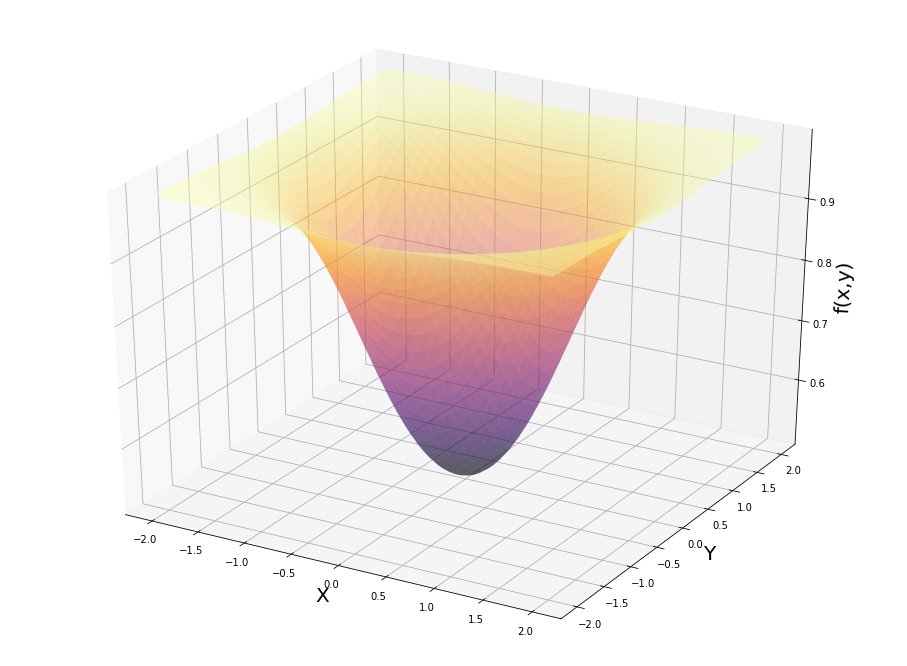

In [ ]:
x_4 = np.linspace(-2,2,200)
y_4 = np.linspace(-2,2,200)

x_4 , y_4 = np.meshgrid(x_4,y_4) #1d to 2d

fig = plt.figure(figsize =[16,12])
axis = fig.gca(projection = '3d')

axis.set_xlabel('X',fontsize = 20)
axis.set_ylabel('Y',fontsize = 20)
axis.set_zlabel('f(x,y)',fontsize = 20)

axis.plot_surface(x_4,y_4,f(x_4,y_4),cmap = cm.inferno, alpha = 0.4) #2d arrays required, for color we use colormap (cm).

# **Partial Derivatives And Symbolic Computation**
##$$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3 ^ {-x^2 - y^2}}{\left( 3^{-x^2 -y^2}+1 \right)^2 }$$
##$$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3 ^ {-x^2 - y^2}}{\left( 3^{-x^2 -y^2}+1 \right)^2 }$$

In [ ]:
a, b = symbols('x, y')

In [ ]:
f(a,b)

1/(3**(-x**2 - y**2) + 1)

In [ ]:
diff(f(a,b),a) #pd wrt x

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [ ]:
diff(f(a,b),b)

2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2

In [ ]:
f(a,b).evalf(subs = {a:1.8, b:1.0})

0.990604794032582

In [ ]:
diff(f(a,b),a).evalf(subs={a:1.8,b:1.0})

0.0368089716197505

In [ ]:
def pdx(x,y):
  r = 3**(-x**2 -y**2)
  return 2*x*log(3)*r / (r+1) ** 2

In [ ]:
def pdy(x,y):
  r = 3**(-x**2 -y**2)
  return 2*y*log(3)*r / (r+1) ** 2

##**Batch Gradient Descent with SymPy**

In [ ]:
alpha = 0.1
max_iter = 200
params = np.array([1.8,1.0]) #inital_value

for i in range(max_iter):
  #gradient_x = diff(f(a,b),a).evalf(subs = {a:params[0], b:params[1]})
  #gradient_y = diff(f(a,b),b).evalf(subs = {a:params[0], b:params[1]})
  gradient_x = pdx(params[0],params[1])
  gradients_y = pdy(params[0],params[1])
  gradients = np.array([gradient_x , gradient_y])
  params = params - alpha * gradients

#Results:

print('Gradients: ',gradients)
print('Minimum at: (x, y)', params[0],  params[1])
print('Cost: ',f(params[0],params[1]))

Gradients:  [6.52114973e-03 1.27124242e-68]
Minimum at: (x, y) 0.015178881279183005 1.0
Cost:  0.7500474567255875


## **Graphing 3D Gradient Descent And Advanced Numpy Arrays.**

In [ ]:
alpha = 0.5
max_iter = 500
params = np.array([1.8,1.0]) #inital_value
values_array = np.array( params.reshape(1,2))
print(values_array.shape)


for i in range(max_iter):
  #gradient_x = diff(f(a,b),a).evalf(subs = {a:params[0], b:params[1]})
  #gradient_y = diff(f(a,b),b).evalf(subs = {a:params[0], b:params[1]})
  gradient_x = pdx(params[0],params[1])
  gradient_y = pdy(params[0],params[1])
  gradients = np.array([gradient_x , gradient_y])
  params = params - alpha * gradients
  #for gd visualization
  values_array = np.append(values_array, params.reshape(1,2),axis = 0)

#Results:
print('Gradients: ',gradients)
print('Minimum at: (x, y)', params[0],  params[1])
print('Cost: ',f(params[0],params[1]))
print (values_array.shape)

(1, 2)
Gradients:  [2.28823636e-68 1.27124242e-68]
Minimum at: (x, y) 3.021566815571008e-68 1.6786482308727828e-68
Cost:  0.5
(501, 2)


In [ ]:
!pip install -U matplotlib

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.2.1)


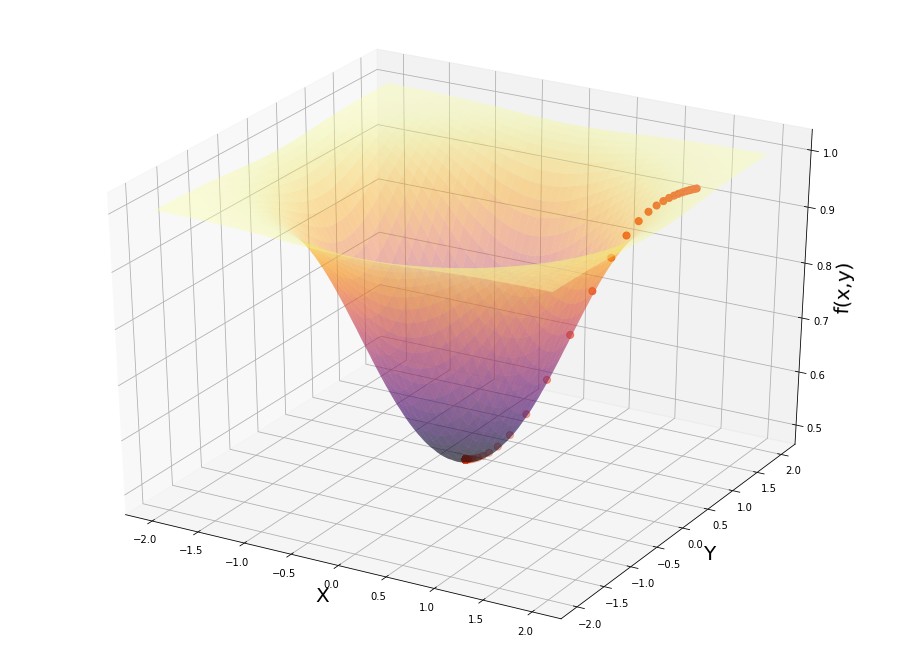

In [ ]:

fig = plt.figure(figsize =[16,12])
axis = fig.gca(projection = '3d')

axis.set_xlabel('X',fontsize = 20)
axis.set_ylabel('Y',fontsize = 20)
axis.set_zlabel('f(x,y)',fontsize = 20)

axis.plot_surface(x_4,y_4,f(x_4,y_4),cmap = cm.inferno, alpha = 0.4) #2d arrays required, for color we use colormap (cm).

axis.scatter(xs = values_array[:,0] , ys = values_array[: , 1] , zs = f(values_array[: , 0], values_array[: , 1]) , s= 50 , color = '#e84118')

In [ ]:
#notice the difference in alpha = 0.5 vs. alpha = 0.1

#**Example 5: Working With Data And Real Cost Function.**
##**Mean Squared Error: Cost function for regression problems**
### $$ RSS = \sum_{i = 1}^n {\big(y^{(i)} - h_\theta x^{(i)} \big)^2} $$
### $$ MSE = \frac{1}{n}  \sum_{i = 1}^n {\big(y^{(i)} - h_\theta x^{(i)} \big)^2} $$

In [ ]:
# sample data
x_5 = np.array([[0.1 , 1.2 , 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([[1.7 , 2.4 , 3.5, 3.0, 6.1, 9.4, 8.2]]).transpose() 
#because fit() accepts a matrix
#can use reshape too
print(x_5.shape)
print(y_5.shape)

(7, 1)
(7, 1)


In [ ]:
regr = LinearRegression()
regr.fit(x_5,y_5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regr.coef_

In [ ]:
regr.intercept_

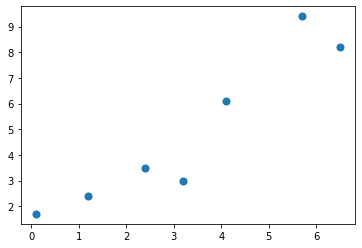

In [ ]:
plt.scatter(x_5,y_5,s=50)

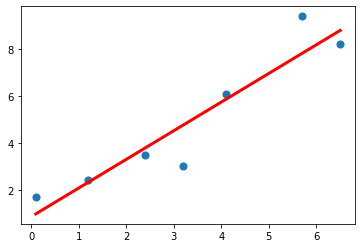

In [ ]:
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5,regr.predict(x_5),linewidth = 3, color = 'red')

In [ ]:
y_hat = regr.intercept_[0] + regr.coef_[0]*x_5

In [ ]:
y_hat

In [ ]:
def mse(y,y_hat):
  rss = 0
  for i in range(len(y)):
    rss = rss + (y[i] - y_hat[i])**2
  return rss/len(y)

  #alt: rss = 1/n * sum((y-y_hat)**2)
  #alt: rss = np.average((y-y_hat)**2,axis = 0)

In [ ]:
print('Manually: ',mse(y_5,y_hat))

In [ ]:
print('Inbuilt: ',mean_squared_error(y_5,y_hat))
print('Inbuilt 2: ',mean_squared_error(y_5,regr.predict(x_5)))

##**3D Plot For The MSE Cost function.**

In [ ]:
#sample theta values to calculate mse.
nr_thetas = 200
th_0 = np.linspace(-1, 3, nr_thetas)
th_1 = np.linspace(-1, 3, nr_thetas)

In [ ]:
plot_t0 , plot_t1 = np.meshgrid(th_0 , th_1)

In [ ]:
plot_t0

array([[-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       ...,
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ]])

###**Calculating MSE**

In [ ]:
plot_cost = np.zeros((nr_thetas,nr_thetas))
for i in range(nr_thetas):
  for j in range(nr_thetas):
    y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
    plot_cost[i][j] = mse(y_5,y_hat)

In [ ]:
plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

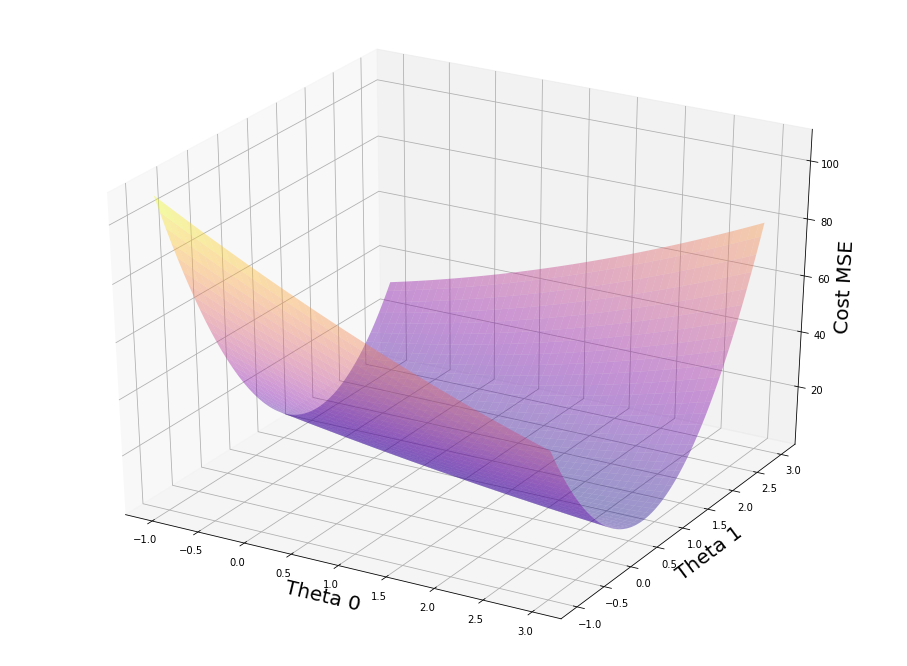

In [ ]:
fig = plt.figure(figsize = [16,12])
axis = fig.gca(projection = '3d')
axis.set_xlabel('Theta 0', fontsize = 20)
axis.set_ylabel('Theta 1', fontsize = 20)
axis.set_zlabel('Cost MSE', fontsize = 20)

axis.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.plasma , alpha = 0.4)

In [ ]:
ij_min = np.unravel_index(plot_cost.argmin(), shape = plot_cost.shape) 

In [ ]:
print('Minimum: ', ij_min)

In [ ]:
print('Theta 0: ',plot_t0[111][91])
print('Theta 1: ', plot_t1[111][91])

Theta 0:  0.829145728643216
Theta 1:  1.2311557788944723


##**Partial Derivative of MSE w.r.t. $\theta_0$ and $\theta_1$:**
### $$\frac{ \partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i = 1}^{n} \big( y^ {(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$
### $$\frac{ \partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i = 1}^{n} \big( y^ {(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)}\big)$$

##**MSE And Gradient Descent**

In [ ]:
#calculating partial derivatives
def grad(x,y,thetas):
  n = y.size
  theta0_slope = -2 * np.average((y - thetas[0] - thetas[1]*x), axis = 0)
  theta1_slope = -2 * np.average(x*(y - thetas[0] - thetas[1]*x), axis = 0)
  #return np.array([theta0_slope[0],theta1_slope[1]])
  return np.append(theta0_slope,theta1_slope)

In [ ]:
alpha = 0.01
thetas = np.array([2.9,2.9])

#scatterplot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5,thetas[0] + thetas[1]*x_5)


for i in range(1000):
  thetas = thetas - alpha * grad(x_5,y_5,thetas)
  plot_vals = np.concatenate((plot_vals,thetas.reshape(1,2)),axis=0)
  mse_vals = np.append((mse_vals),(mse(y_5,thetas[0]+thetas[1]*x_5)))

In [ ]:
print('Minimum occurs at: ',thetas[0])
print('Minimum occurs at: ',thetas[1])
print('Cost function: ',mse(y_5,thetas[0] + thetas[1]*x_5))

Minimum occurs at:  0.8532230461743415
Minimum occurs at:  1.2214935332607393
Cost function:  [0.94797511]


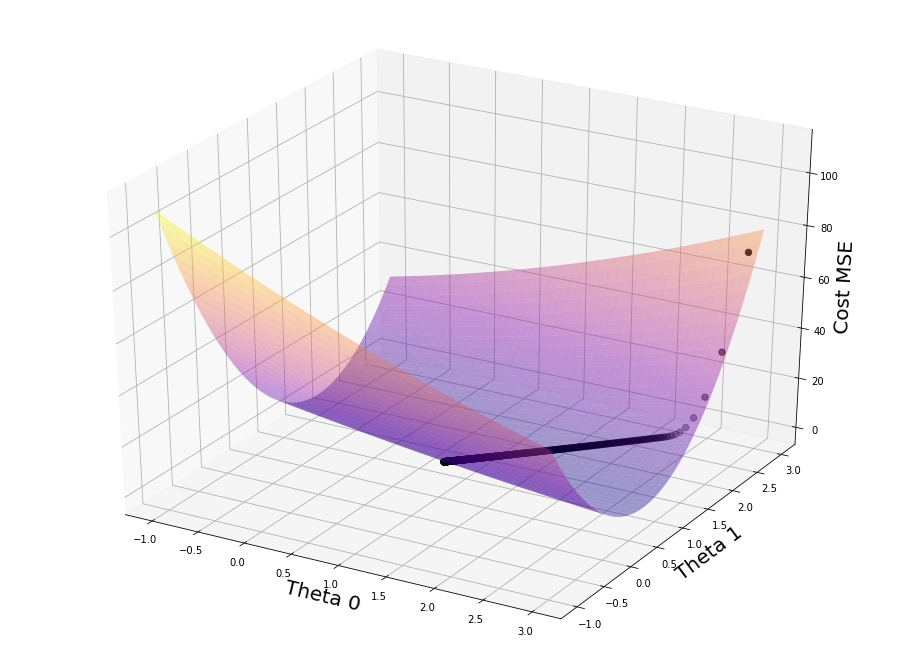

In [ ]:
fig = plt.figure(figsize = [16,12])
axis = fig.gca(projection = '3d')
axis.set_xlabel('Theta 0', fontsize = 20)
axis.set_ylabel('Theta 1', fontsize = 20)
axis.set_zlabel('Cost MSE', fontsize = 20)

axis.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.plasma , alpha = 0.4)
axis.scatter(plot_vals[:,0], plot_vals[:,0] , mse_vals, s = 40 , color = 'black')